# Analysis

## Set-up data for the experiments

In [3]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/final/data_matrix.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_Red blood cell count_last,labs_Calcium level_last,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,4.37,9.5,90.4,34.9,31.6,3.8,15.5,97.0,21.0,19.0
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,3.29,7.6,92.1,34.3,31.6,10.0,16.7,154.0,21.0,14.0
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,3.34,7.9,91.6,33.7,30.8,12.9,17.3,105.0,22.0,13.0
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,3.14,8.2,91.4,33.8,30.9,11.7,17.0,123.0,22.0,12.0
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,2.86,8.0,95.1,33.1,31.5,9.9,17.2,116.0,22.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,3.37,8.1,92.0,35.0,32.0,14.4,13.7,62.0,19.0,6.0
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,3.32,7.8,92.0,35.0,33.0,11.4,14.1,98.0,21.0,3.0
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,4.10,8.0,88.0,33.0,29.0,8.7,17.5,143.0,25.0,7.0
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,3.80,8.5,87.0,33.0,29.0,6.9,17.4,159.0,25.0,7.0


In [13]:
import numpy as np

len(datamatrixDf.visit_occurrence_id.unique()), len(np.random.choice(datamatrixDf.visit_occurrence_id.unique(), size=200, replace=False))

(11146, 200)

In [35]:
for sample in list(range(200, 1000, 100)) + list(range(1000, 11000, 1000)) + [len(datamatrixDf.visit_occurrence_id.unique())]:
    sampledDataMatrix = datamatrixDf[datamatrixDf.visit_occurrence_id.isin(np.random.choice(datamatrixDf.visit_occurrence_id.unique(), size=sample, replace=False))]
    sampledDataMatrix.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/02_sample_size_analysis/datamatrix/data_matrix_sample_' + str(sample) + '.csv', index=False)
    print(sampledDataMatrix.shape, len(sampledDataMatrix.visit_occurrence_id.unique()))

(1067, 125) 200
(1516, 125) 300
(2105, 125) 400
(2409, 125) 500
(3015, 125) 600
(3518, 125) 700
(3922, 125) 800
(4753, 125) 900
(4885, 125) 1000
(9872, 125) 2000
(15298, 125) 3000
(20800, 125) 4000
(25430, 125) 5000
(30272, 125) 6000
(35215, 125) 7000
(40705, 125) 8000
(45383, 125) 9000
(50512, 125) 10000
(56237, 125) 11146


## Run the analysis

In [4]:
import os


for sample in list(range(200, 1000, 100)) + list(range(1000, 11000, 1000)) + [len(datamatrixDf.visit_occurrence_id.unique())]:
        print('Sample Size: ' + str(sample))
        os.system(
            'cd ' + os.environ['EHR_ML_BASE'] + ';'
            +
            '''.venv/bin/python -m ehrml.predict_mortality.Evaluate ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/02_sample_size_analysis/datamatrix/data_matrix_sample_''' + str(sample) + '''.csv -tc "death_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(3) + ''' -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/02_sample_size_analysis/results/ts_0_te_7_wb_0_wa_3_sample_''' + str(sample) + '''.json;'''
            )


windowBefore: 0windowAfter: 1
2023-11-29 14:51:24,029 - EHR-ML - INFO - Parsing command line arguments
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/final/data_matrix.csv
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.target_column: death_0_7_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.anchor_date_column: visit_start_datetime_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_before: 0
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_after: 1
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/experiments/01_time_window_analysis/ts_0_te_7_wb_0_wa_1
2023-11-29 14:51:24,589 - EHR-ML - INFO - Split data to test 

## Target Start: 0 and Target End: 7

### Read the results

In [7]:
import os
import json

import numpy as np
import pandas as pd


resultsDirPath = os.environ['MIMIC_EHR_PIPELINE_BASE'] + '/data/sepsis_icd_cohort/experiments/01_time_window_analysis'

plotDf = pd.DataFrame(np.zeros([3, 6])*np.nan)
for file in os.listdir(resultsDirPath):
    if file.startswith('ts_0_te_7') and file.endswith('.json'):
        wb = int(file.split('.')[0].split('_')[5])
        wa = int(file.split('.')[0].split('_')[7]) - 1
        with open(resultsDirPath + '/' + file) as f:
            aurocs = json.load(f)['test_roc_auc']
            mean = sum(aurocs)/len(aurocs)
            plotDf.at[wb, wa] = mean
plotDf

,0,1,2,3,4,5
0,0.607506,0.617994,0.685044,0.705413,0.726254,0.717423
1,0.642935,0.713503,0.670012,0.662225,0.689725,0.769791
2,0.642935,0.713503,0.670012,0.662225,0.689725,0.769791


### Plot

[Text(0.5, 23.52222222222222, 'Window After (days)'),
 Text(50.722222222222214, 0.5, 'Window Before (days)')]

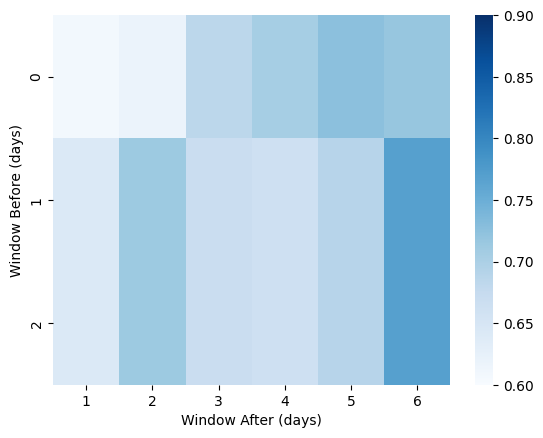

In [8]:
import seaborn as sns


s = sns.heatmap(
    plotDf,
    # annot=True,
    # fmt=".2f",
    cmap="Blues",
    vmin=0.6,
    vmax=0.9,
    yticklabels=['0', '1', '2'],
    xticklabels=['1', '2', '3', '4', '5', '6'],
    
)
s.set(xlabel='Window After (days)', ylabel='Window Before (days)')

## Target Start: 0 and Target End: 14

### Read the results

In [3]:
import os
import json

import numpy as np
import pandas as pd


resultsDirPath = os.environ['MIMIC_EHR_PIPELINE_BASE'] + '/data/sepsis_icd_cohort/experiments/01_time_window_analysis'

plotDf = pd.DataFrame(np.zeros([3, 6])*np.nan)
for file in os.listdir(resultsDirPath):
    if file.startswith('ts_0_te_14') and file.endswith('.json'):
        wb = int(file.split('.')[0].split('_')[5])
        wa = int(file.split('.')[0].split('_')[7]) - 1
        with open(resultsDirPath + '/' + file) as f:
            aurocs = json.load(f)['test_roc_auc']
            mean = sum(aurocs)/len(aurocs)
            plotDf.at[wb, wa] = mean
plotDf

,0,1,2,3,4,5
0,0.559734,0.592657,0.652906,0.652165,0.659148,0.655976
1,0.470408,0.615188,0.643700,0.653625,0.653887,0.681227
2,0.470408,0.615188,0.643700,0.653625,0.653887,0.681227


### Plot

[Text(0.5, 23.52222222222222, 'Window After (days)'),
 Text(50.722222222222214, 0.5, 'Window Before (days)')]

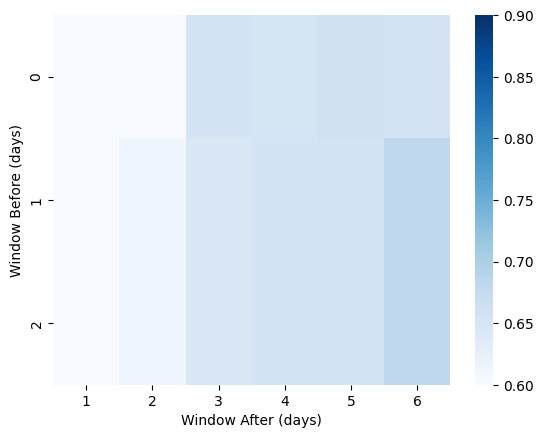

In [6]:
import seaborn as sns


s = sns.heatmap(
    plotDf,
    cmap="Blues",
    vmin=0.6,
    vmax=0.9,
    yticklabels=['0', '1', '2'],
    xticklabels=['1', '2', '3', '4', '5', '6'],
    
)
s.set(xlabel='Window After (days)', ylabel='Window Before (days)')